<a href="https://colab.research.google.com/github/a-smoovy/Approximation-to-Image-Compression/blob/main/104C_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

## **The Application of Low Rank Approximation to Image Compression - Singular Value Decomposition**

#### **Tyler Reed, Austin Sparrow, Ethan Mayoss, Kevin Ye, Jack McMann**

**June 5, 2024**

</center>

### **Introduction & Motivation**

The phenomenon of image compression has emerged as a focal point of data analysis and machine learning given the progression of technology the 21st century has witnessed. As a result, there are several existing forms of data compression that have entered this space -- namely, JPEG, PNG, and, more recently, GIFs -- and have taken the image compression space by storm.  With this in mind, the objective of this study is to apply the method of singular value decomposition (SVD) and analyze its image compression performance for different parameter values. The evaluation of SVD's image reconstruction performance is carried out in a multitude of ways including monitoring runtime, analyzing image resolution and clarity, and comparing the results to those of other established compression methods. Specifically, fast fourier transformation (FFT) and wavelet transform compression are implemented for analytical and examanatory purposes - how will SVD's image reconstruction compare to that of orthodox compression methods?

Now that the general objective of this study has been outlined, it is necessary that the SVD method is contextualized. In the most broad sense, SVD serves to reveal the basic structure of a given matrix with the intent of identifying relations between data. This is achieved through reducing the size of a dataset while striving to maintain the strong majority of variability present within it. Specifically, given an m-by-n matrix A, the process of SVD fragments this matrix into three components:

i) A diagonal, m-by-n matrix S is created whose diagonal entries represent the singular values, denoted $s_{i}$. In particular, the singular values $s_{i}$ represent the square root of the nonnegative eigenvalues $s_{i}^{2}$ of the matrix product $A^{T}A$.

ii) A n-by-n matrix V is produced, where the columns of this matrix indicate the right singular vectors, denoted $v_{i}$. Specifically, the right singular vectors $v_{i}$ are the corresponding eigenvectors of $A^{T}A$.

iii) A m-by-m matrix U is constructed, where this matrix's columns consist of the left singular vectors, denoted $u_{i}$. The left singular vectors $u_{i}$ are computed using the following equation: for nonzero singular values $s_{i}$, $u_{i}$'s are defined by $s_{i}u_{i} = Av_{i}$ for all $i$.

Consequently, the SVD of a matrix A is constructed using the equality $A = USV^{T}$.

Transitioning to the problem of interest, the image this study aims to effectively compress is displayed below:


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


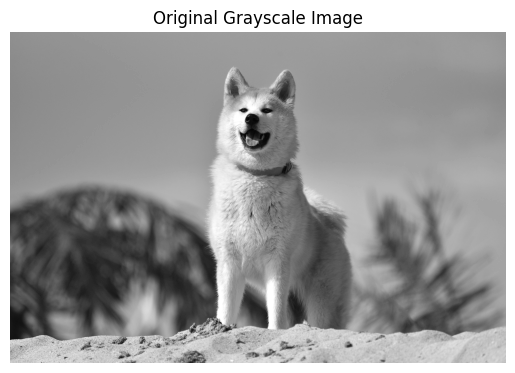

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
import timeit

from google.colab import drive
drive.mount('/content/drive')


image = io.imread('/content/drive/MyDrive/Math104Series/dog_image.jpg')
gray_image = color.rgb2gray(image)

plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

### **Results and Brief Analysis**

As commented on above, the results displayed in this section illustrate the performance of SVD as an image compression technique. The image reconstruction performance of this method is analyzed and compared to the image reconstructions of well-established compression methods FFT and wavelet transform compression.

##### **SVD**:

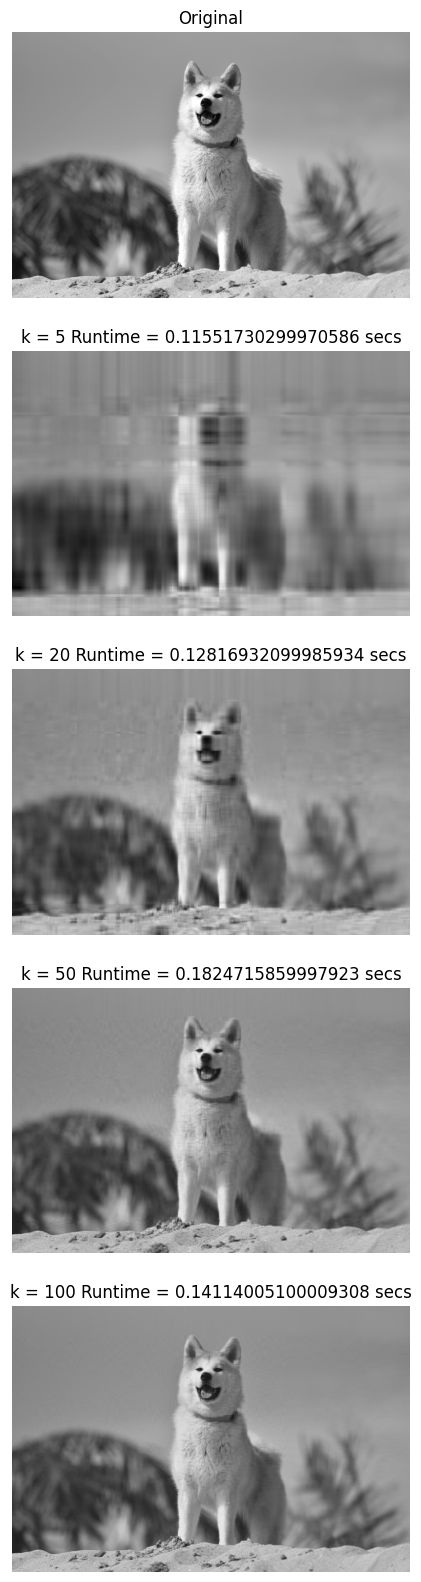

In [ ]:
# SVD

U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

k_values = [5, 20, 50, 100]
fig, axes = plt.subplots(len(k_values) + 1, figsize=(60, 20))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for i, k in enumerate(k_values):
    start = timeit.default_timer()
    compressed_image = reconstruct_image(U, S, Vt, k)
    axes[i + 1].imshow(compressed_image, cmap='gray')

    axes[i + 1].axis('off')
    stop = timeit.default_timer()
    axes[i + 1].set_title(f'k = {k} Runtime = {stop-start} secs')

plt.show()

Based on the results of executing this form of image compression, there are a couple of obvious findings. To begin, it is evident that as the $k$ value increases, the image resolution of the compressed image improves. Specifically, the $k$ value represents the number of singular values $s_{i}$ that are retained in the image reconstruction process, which implies that there are $k$ retained left and right singular vectors as well. Further, analyzing the runtime of each image reconstruction is an indicator of how well this method performed. Based on the data above, the runtime values were unexpected: the $k = 5$ implementation illustrated the fastest runtime, which comes by no surprise, but the $k=50$ implementation reconstructed the image the slowest. It was expected that the $k=100$ implementation of SVD would require the most time given that it retains the most singular values, but this was not the case. Despite this characteristic, the runtimes of all four implementations were pretty similar, as these times spanned 0.116 to 0.182 seconds.

##### **FFT**

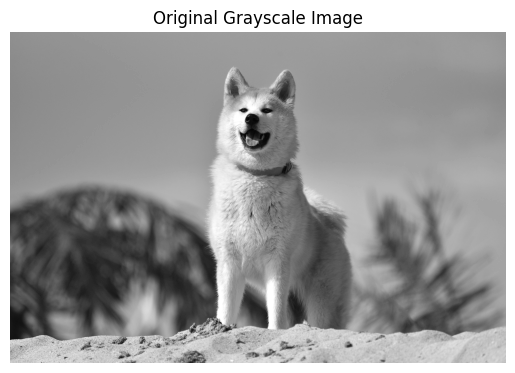

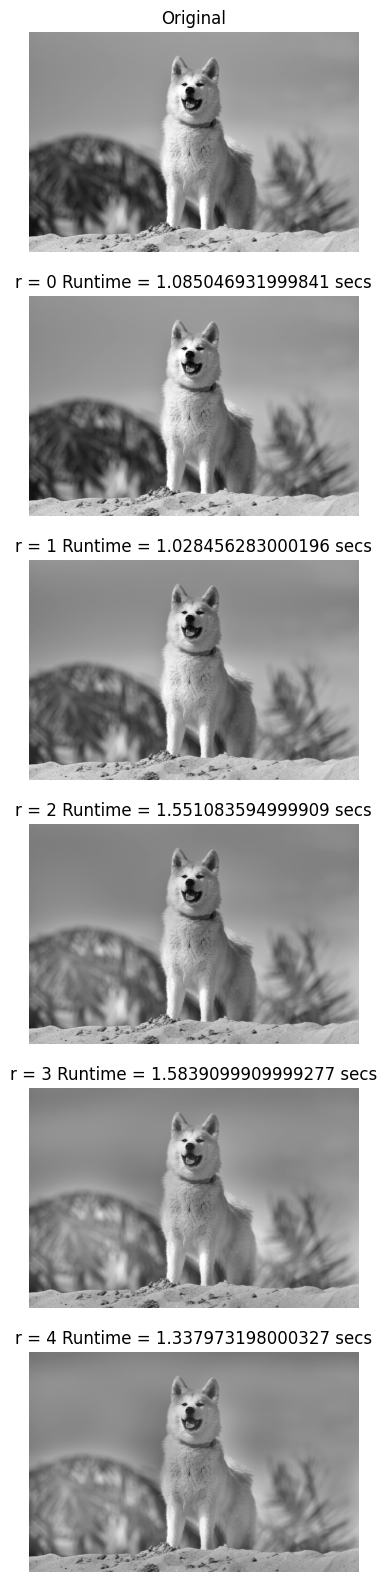

In [ ]:
# FFT

plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

def fft_compress(img, rate):
    img = np.fft.fft2(img)

    img_shift = np.fft.fftshift(img)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols //2

    img_shift[crow - rate:crow + rate, ccol - rate:ccol + rate] = 0

    img = np.fft.ifft2(np.fft.ifftshift(img_shift))

    return np.real(img)


rate_vals = np.arange(5)

fig, axes = plt.subplots(len(rate_vals) + 1, figsize=(60, 20))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for i, r in enumerate(rate_vals):

  start = timeit.default_timer()
  fft_image = fft_compress(gray_image, r)
  axes[i + 1].imshow(fft_image, cmap='gray')
  axes[i + 1].axis('off')
  stop = timeit.default_timer()
  axes[i + 1].set_title(f'r = {r} Runtime = {stop-start} secs')

Transitioning to the results of executing the FFT image compression program, it is evident that strong image resolution is maintained, regardless of the parameter $r$ value. This result is expected, as FFT is an established image lossy compression method that is similar to the coveted method of JPEG. Further, in this context, the value $r$ indicates the rate parameter, or the sampling rate; lower values of $r$ implies that less data is retained in the compression process. Thus, it is expected that as $r$ increases, the runtime of the image reconstruction process increases. However, this was not precisely the case -- the implementation where $r = 1$ had the quickest runtime and the $r=3$ implementation illustrated the longest runtime.

Comparing these results to those generated by implementing SVD, it is evident that the SVD method lacks the level of precision and consistency in terms of image resolution that the FFT method displays. While the SVD method generated its reconstructions marginally quicker, its images were quite blurry for lower singular value amounts. This shortcoming of SVD is noteworthy, as this method requires a more computationally expensive implementation in order to generate a clear image.

##### **Wavelet Transform Compression**

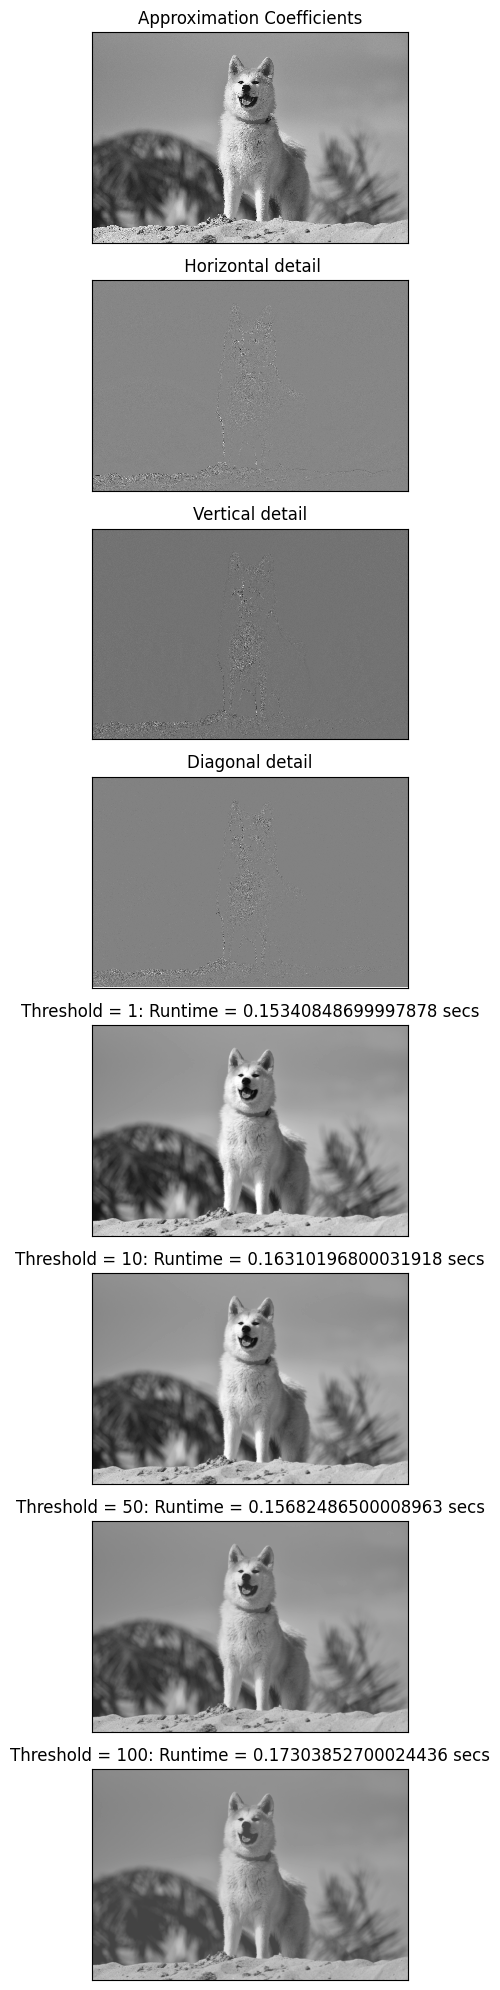

In [ ]:

# Wavelet Compression

import cv2
import pywt

#Read in the image

image = cv2.imread('/content/drive/MyDrive/Math104Series/dog_image.jpg', 0)

coeffs = pywt.dwt2(gray_image, 'bior1.3')

A, (Hor, Vert, Diag) = coeffs

#Plot the images
titles = ['Approximation Coefficients', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs = pywt.dwt2(image, 'bior1.3')
A, (Hor, Vert, Diag) = coeffs

fig, axes = plt.subplots(8, figsize=(60, 20))

for i, a in enumerate([A, Hor, Vert, Diag]):

    axes[i].imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    axes[i].set_title(titles[i])
    axes[i].set_xticks([])
    axes[i].set_yticks([])

#Apply a thresholding limit
threshold = [1, 10, 50, 100]

#Compress the image

for i in range(len(threshold)):
    A_thresholded = pywt.threshold(A, threshold[i], mode='soft')
    Hor_thresholded = pywt.threshold(Hor, threshold[i], mode='soft')
    start = timeit.default_timer()
    coeffs_thresholded = (A_thresholded, (Hor_thresholded, Vert, Diag))
    img_compressed = pywt.idwt2(coeffs_thresholded, 'bior1.3')
    stop = timeit.default_timer()
    axes[i+4].imshow(img_compressed, cmap='gray')
    axes[i+4].set_title(f'Threshold = {threshold[i]}: Runtime = {stop-start} secs')
    axes[i+4].set_xticks([])
    axes[i+4].set_yticks([])

fig.tight_layout()
plt.show()

Lastly, the reconstructed images from implementing wavelet transform compression maintain strong image precision for all threshold values. The interpretation of these threshold values is as follows: increasing the threshold value sets more coefficents equal to zero, thereby dictating how much data is retained in the compression process. Consequently, a higher threshold value should remove more data and make for computationally cheaper and more efficient reconstruction process.

In analyzing the runtimes of these implementations, it is clear they are all very similar, spanning 0.153 seconds to 0.173 seconds. This finding is a little surprising, as the aforementioned paragraph explains the projected activity for runtimes. Further, in comparison to the runtimes of the SVD method, the wavelet transform method is able to generate more precise and clear images, robust to parameter changes, in roughly the same amount time. This claim illustrates the wavelet transform method's strong efficacy as a image compression technique.


### **How Does SVD Compare to Other Image Compression Methods?**
While SVD is one method for image compression, there are numerous other effective methods to compress images.  Discrete Cosine Transformation (DCT) is one of these alternative methods.  Typically, this method breaks a photo down into 8x8 blocks and applies quantization to each block.  Upon the completion of quantization, the inverse of DCT is applied to each individual block and then arranged in order which produces the compressed image.  One of the main advantages of using DCT for image compression is it utilizes low frequency components for compression.  Another main advantage of DCT is the computation speed.  The DCT method has a fast computation time which allows for images to be compressed quickly.  This quicker computational speed can be explained partly by the fact that DCT only uses real values which simplifies the algorithm and allows for speedier processing.  The main disadvantage of the DCT method is its sensitivity to translation and rotation.  When using DCT, any slight translation or rotation of the image can severely affect the quality of the image compression.  The DCT is also prone to blocking artifacts which can distort and blur the result.  It is important to keep this in mind when planning to implement DCT.  When compared to SVD, it can be seen that the DCT method results in smaller file sizes and a higher quality image, though it does have its disadvantages.

Another alternative method of image compression is the Discrete Fourier Transform (DFT).  The DFT method is similar to the DCT method, except it is not restricted to real values and instead uses a series of complex exponential functions.  DFT is translation invariant, which is the main advantage of using this method over others.  While this is helpful, the DFT method also has a longer computation time as it uses complex functions and requires more coefficients.  This is important to consider when comparing to SVD, as one of the main benefits of SVD is its low computational complexity and processing time.

Discrete Wavelet Transform (DWT) is another popular method for image compression.  This method is similar to the fourier transform, however they differ in the type of waves utilized during the computation.  The fourier transform uses simple sine and cosine waves while the DWT uses wavelets, which are complex in nature.  In addition, the DWT wavelets are bounded at both ends, which is different from the sine and cosine waves of the fourier transform that continue on forever.  One of the biggest advantages of DWT is its ability to avoid blocking artifacts.  When blocking artifacts occur, they blend pixels together, causing blurriness in certain blocks of the compressed image.  Blocking artifacts are one of the potential downfalls of other methods such as DCT, DFT, or PCA.  The biggest disadvantage of DWT is it is not shift invariant and therefore any slight movement of the image could distort the compression results.  When compared to SVD, the DWT method produces a higher quality image with higher rates of compression.

A fourth alternative method of image compression is Principal Component Analysis (PCA).  This method achieves compression by constructing the images as a linear combination of its principal components.  The PCA method works to find the most essential orthogonal components of an image.  By doing so, it provides a reduction in dimension and requires less storage space for the image.  When utilizing the PCA method, the eigenvectors of the covariance matrix serve as the principal components and the corresponding eigenvalues represent the variance of each component, respectively.  The main benefit of PCA for image compression is the reduction of storage space which allows for faster download times and quicker computer speeds after downloading.  The downside of PCA is the amount of computational energy required and the risk of losing image quality during the process.  While providing lots of advantages, it is important to note that using the PCA method results in a significantly more complex and time consuming computation when compared to SVD.


### **Conclusion**

Ultimately, the choice between different compression methods depends on the specific requirements of compression, such as the balance between quality and efficiency. In this study, it was shown that SVD is well-suited for compression of a basic gray-scale image with an efficient run-time and high quality in an environment where a substantial amount of data is retained. In the future, an attempt at compressing a color image could be made to further explore SVD as a method of image compression. For this, instead of applying the method on the single channel of a gray image, intensity, the SVD would be applied to different matrices representing the three channels of color images, red, green, and blue.

Overall, this project went very smoothly. The research and idea for our exploration of Singular Value Decomposition was conducted in a timely manner, and our group worked very well together. One part of the project was familiarizing ourselves with the method of SVD for image compression. As we hadn’t discussed much of SVD in class, we relied on the textbook to work out the details of the method and used the NumPy package, `np.linalg.svd` to compress the original image into the form $A=USV^T$. Similarly, the PyWavelets package, `pywt`, was used to implement the 2-dimensional discrete wavelet transform compression on the image. While helpful in certain cases, no AI was used to create the code for this project.   


##### **Resources**

1. Numerical Analysis, Second Edition by Timothy Sauer
2. “Singular Value Decomposition.” Climate Data Library, iridl.ldeo.columbia.edu/dochelp/StatTutorial/SVD/index.html#Analysis. Accessed 3 June 2024.
3. "Comparative study of DWT, DCT, BTC and SVD techniques for image compression." IEEE Conference Publication, https://ieeexplore.ieee.org/document/8378167
4. "Image Compression by Wavelet Transformation." by Pangrong Xiao, https://dc.etsu.edu/cgi/viewcontent.cgi?article=1108&context=etd
5. "What are the advantages and disadvantages of using DCT over other transforms for image processing?" Linkedin Expert Panel, https://www.linkedin.com/advice/1/what-advantages-disadvantages-using-dct
6. "Image Compression - DCT Method." by Ojaas Hampiholi, https://towardsdatascience.com/image-compression-dct-method-f2bb79419587
7. "Image Compression Techniques: A Closer Look at Principal Component Analysis." by Ujang Riswanto, https://ujangriswanto08.medium.com/image-compression-techniques-a-closer-look-at-principal-component-analysis-67cf7a29fdb9
